Nama: Mohammad Daffa Gashandy

NIM: 20/455449/PA/19664

Kelas: KOMB

Cara Menggunakan Program Ini : 

1.   Insert Gambar dari Directory ke Google Collab
2.   Jalankan program
3.   Membuat Non-Uniform Quantized Image & Histogram
4.   Men-costumize nilai dari K
5.   Bandingkan dan Buat Kesimpulan


# Code

Import Library & Image

In [53]:
import cv2 as cv # Import Image & Color Manipulation
import matplotlib.pyplot as plt # Histogram & Show Result
import numpy as np # Algorithm

# Import Image From GDrive
from google.colab import drive 
drive.mount('/content/gdrive')
img = cv.imread('/content/gdrive/MyDrive/Inosuke.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # RGB image
imgbnw = cv.cvtColor(img, cv.COLOR_RGB2GRAY) # Grayscale image

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Menampilkan Raw Image & Histogram

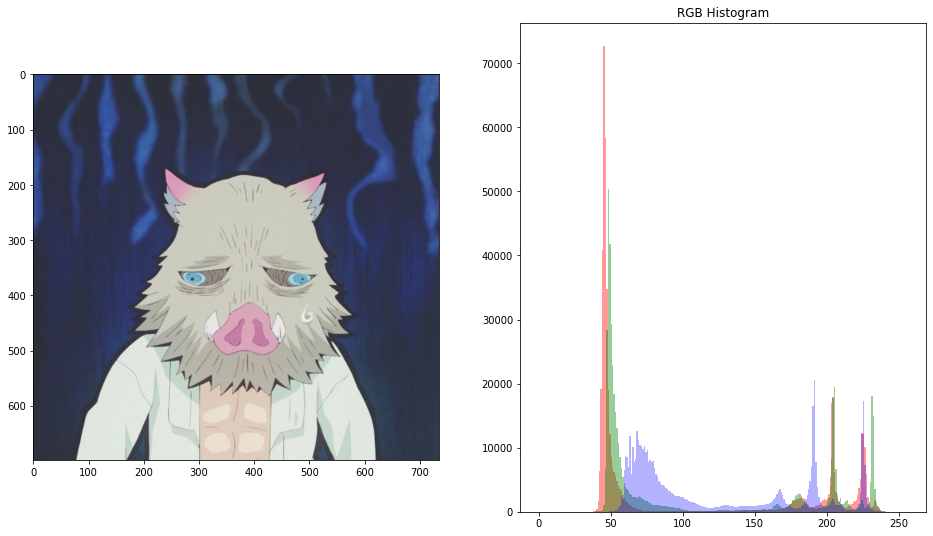

In [78]:
# Show RGB Image
plt.figure(figsize=(16,9))
plt.title('RGB Image')
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)

# To Show RGB Histogram from uploaded Image
plt.title('RGB Histogram')
plt.hist(img[:,:,0].ravel(), bins=256, range=(0, 256), color='red', alpha = 0.4)
plt.hist(img[:,:,1].ravel(), bins=256, range=(0, 256), color='green', alpha = 0.4)
plt.hist(img[:,:,2].ravel(), bins=256, range=(0, 256), color='blue', alpha = 0.3)
plt.show()

Menampilkan Grayscale Image & Histogram

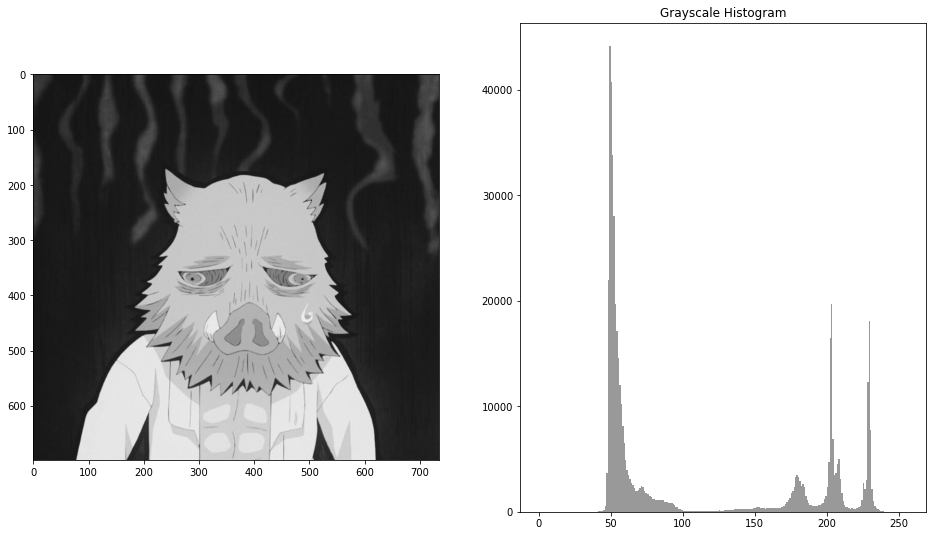

In [79]:
# To Show Grayscaled Image 
plt.figure(figsize=(16,9))
plt.title('Grayscale Image')
plt.subplot(121)
plt.imshow(imgbnw, cmap='gray')
plt.subplot(122)

# Show Grayscaled Histogram from Grayscaled Image
plt.title('Grayscale Histogram')
plt.hist(imgbnw.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

Non-Uniform Quantization Algorithm to Calculate Mean Quantization

In [107]:
def meanQuan(K):
    # Create New Sorted Array of imgbnw 
    sorted_img = imgbnw.copy()
    sorted_img = sorted_img.ravel()
    sorted_img.sort()

    # Create Empty List For Indexing
    index_array = []
    index_array.append([])
    index_array[-1].append(0)
    index_array[-1].append(0)
    index_array.append([])
    index_array[-1].append(len(sorted_img))
    index_array[-1].append(256)

    # Fill array index_array based on image data and K
    for i in range(int(np.log2(K))):
        length = len(index_array)
        for i in range(length-1):
            # Get the partial list to work with
            partiallst = sorted_img[int(index_array[i][0]):int(index_array[i+1][0])]
            # Get index of last mean value in list. Return index+1 of the value
            where = np.where(sorted_img == int(partiallst.mean()))[0][-1]+1
            # Insert index and value of mean to index_array
            index_array.append([])
            index_array[-1].append(where)
            index_array[-1].append(int(partiallst.mean()))
        index_array.sort()

    # Get mean value for each part of the graph
    for i in range (len(index_array)-1):
        partiallst = sorted_img[int(index_array[i][0]):int(index_array[i+1][0])]
        index_array[i+1].append(int(partiallst.mean()))

    # Create copy of imgbnw
    quantized_imgbnw = imgbnw.copy()

    # Structure:
    # array.shape[rows][column]
    rows = quantized_imgbnw.shape[0]
    cols = quantized_imgbnw.shape[1]

    for i in range (rows):
        for j in range (cols):
            # quantized_imgbnw[i][j] = 125
            for k in range (len(index_array)-1):
                if(quantized_imgbnw[i][j] > index_array[k][1]) and (quantized_imgbnw[i][j] <= index_array[k+1][1]):
                    quantized_imgbnw[i][j] = index_array[k+1][2]
                    break
                else:
                    continue 

    return quantized_imgbnw

Non-Uniform Quantization Algorithm to Calculate Median Quantization

In [82]:
def medianQuan(K):
    # Create New Sorted Array of imgbnw  
    sorted_img = imgbnw.copy()
    sorted_img = sorted_img.ravel()
    sorted_img.sort()

    # Create Empty List For Indexing
    index_array = []
    index_array.append([])
    index_array[-1].append(0)
    index_array[-1].append(0)
    index_array.append([])
    index_array[-1].append(len(sorted_img))
    index_array[-1].append(256)

    # Fill array index_array based on image data and K
    for i in range(int(np.log2(K))):
        length = len(index_array)
        for i in range(length-1):
            # Get the partial list to work with
            partiallst = sorted_img[int(index_array[i][0]):int(index_array[i+1][0])]
            # Get index of last median value in list. Return index+1 of the value
            where = np.where(sorted_img == int(np.median(partiallst)))[0][-1]+1
            # Insert index and value of mean to index_array
            index_array.append([])
            index_array[-1].append(where)
            index_array[-1].append(int(np.median(partiallst)))
        index_array.sort()

    # Get mean value for each part of the graph
    for i in range (len(index_array)-1):
        partiallst = sorted_img[int(index_array[i][0]):int(index_array[i+1][0])]
        index_array[i+1].append(int(partiallst.mean()))

    # Create copy of imgbnw
    quantized_imgbnw = imgbnw.copy()

    # Structure:
    # array.shape[rows][column]
    rows = quantized_imgbnw.shape[0]
    cols = quantized_imgbnw.shape[1]

    for i in range (rows):
        for j in range (cols):
            # quantized_imgbnw[i][j] = 125
            for k in range (len(index_array)-1):
                if(quantized_imgbnw[i][j] > index_array[k][1]) and (quantized_imgbnw[i][j] <= index_array[k+1][1]):
                    quantized_imgbnw[i][j] = index_array[k+1][2]
                    break
                else:
                    continue 
    
    return quantized_imgbnw

Function to Quantization

In [102]:
def showQuan(the_img, imgname, K, val):
    the_title = str(imgname + " Quantized with " + val + " K = " + str(K))

    plt.figure(figsize=(16,9))
    plt.title('Grayscale Image')
    plt.subplot(121)
    plt.title(the_title)
    plt.imshow(the_img, cmap='gray')
    plt.subplot(122)
    plt.title(the_title)
    plt.hist(the_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
    plt.show()

Function to Show Mean and Median Quantization

In [104]:
def mean_Quantization(K, img_name):
    val = "Mean"
    showQuan(meanQuan(K),img_name, K, val)

def median_Quantization(K, img_name):
    val = "Median"
    showQuan(medianQuan(K),img_name, K, val)

Show Quantization (Median & Mean)

*Note : Customize your K Value to Compare Quantization Result. For Example(K) = 1,2,3,9*

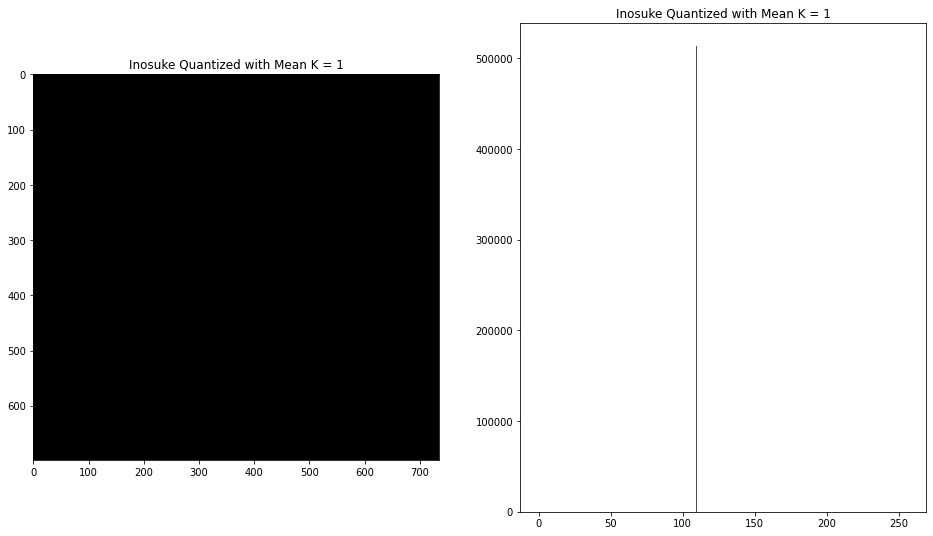

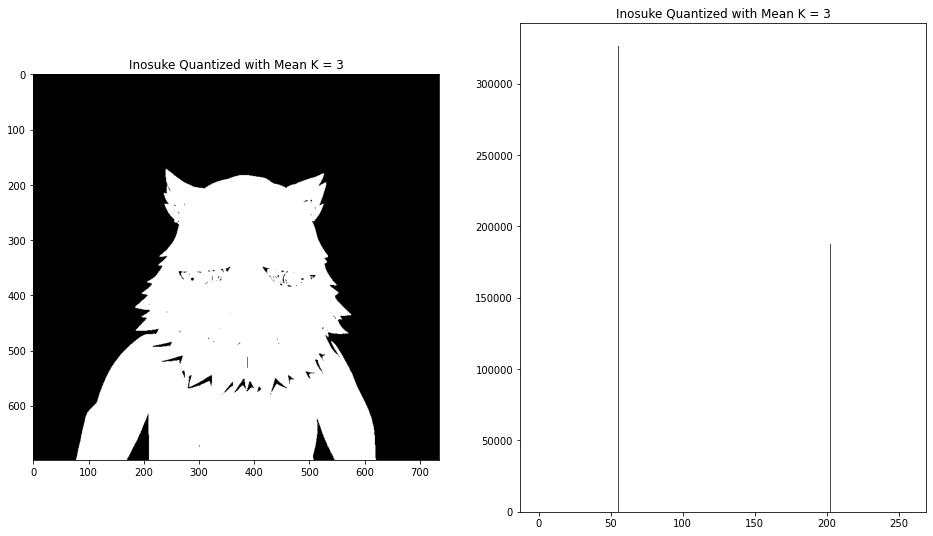

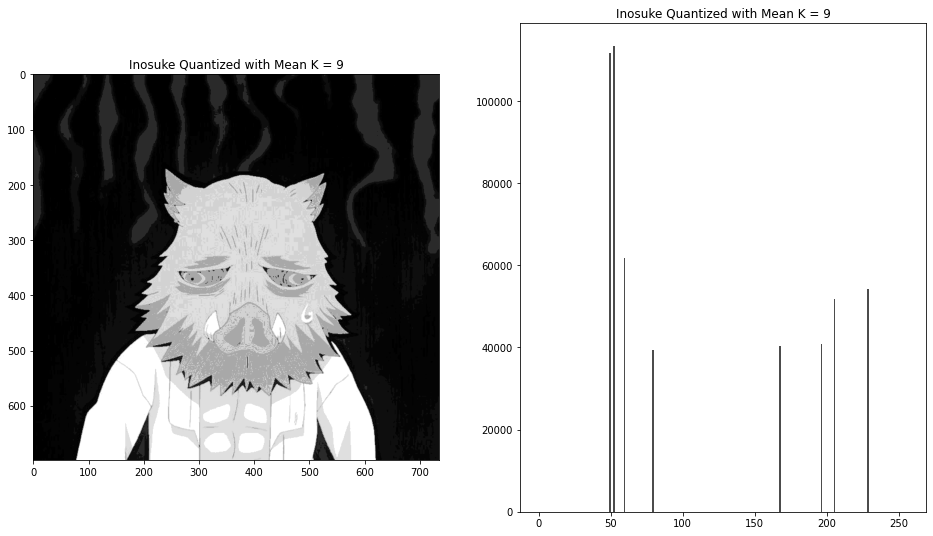

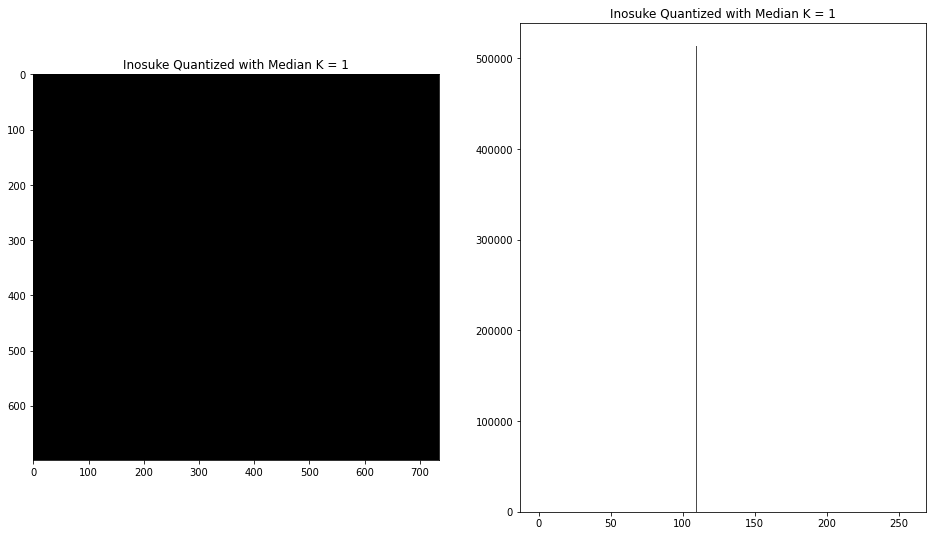

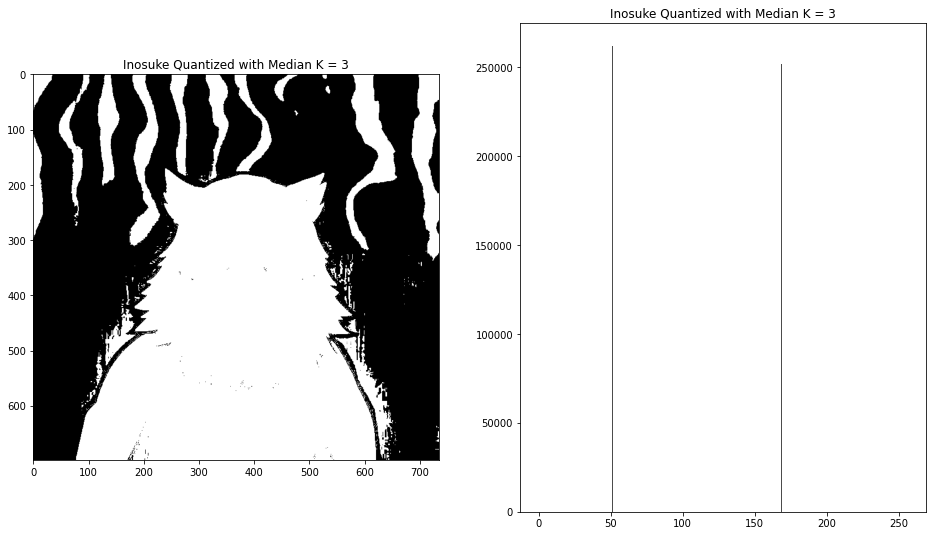

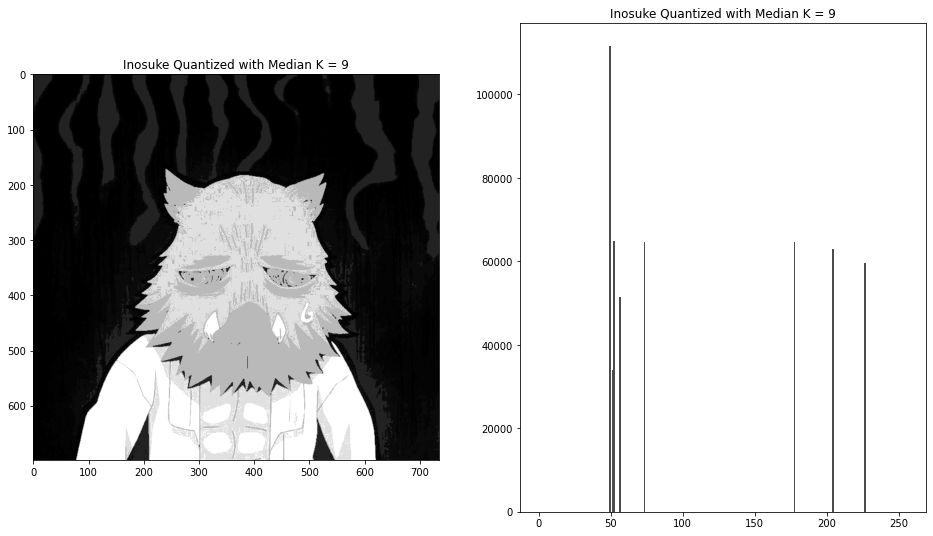

In [111]:
# Show Mean Quantization
mean_Quantization(1, img_name)
mean_Quantization(2, img_name)
mean_Quantization(3, img_name)
mean_Quantization(9, img_name)

# Show Median Quantization
median_Quantization(1, img_name)
median_Quantization(3, img_name)
median_Quantization(9, img_name)

# Kesimpulan

Pada histogram, untuk nilai k = 0,1,2,..L-1 . Dinotasikan sebagai L-level gambar digital. Misalnya pada gambar menunjukkan karakterisitik intensitas dasar. Pada gambar gelap, bin histogram yang paling padat terkonsentrasi di ujung bawah (gelap) skala intensitas. Demikian pula, tempat sampah yang paling padat dari gambar cahaya bias menuju ujung skala yang lebih tinggi. Gambar dengan kontras rendah memiliki yang sempit


Untuk gambar monokrom, ini menyiratkan tampilan abu-abu kusam dan pudar. Akhirnya, kita melihat bahwa komponen histogram gambar kontras tinggi mencakup rentang yang luas skala intensitas, dan distribusi piksel tidak terlalu jauh dari seragam, dengan beberapa tempat sampah jauh lebih tinggi dari yang lain. 


Secara intuitif, masuk akal untuk menyimpulkan bahwa gambar yang pikselnya cenderung menempati seluruh rentang tingkat intensitas yang mungkin dan, di samping itu, cenderung terdistribusi secara seragam, akan memiliki tampilan tinggi kontras dan akan menunjukkan berbagai macam nada abu-abu. Efek bersihnya akan menjadi gambar yang menunjukkan banyak detail tingkat abu-abu dan memiliki rentang dinamis yang tinggi. 

